# **FINAL PROJECT GROUP 9: Prediksi Jumlah Penjualan Produk**

## ✨ Penjelasan tentang Final Project ✨

---

### 1. 📖 Latar Belakang  
Seorang manajer pemasaran di perusahaan ritel FMCG ingin meningkatkan jumlah penjualan unit produk, namun kesulitan menentukan faktor-faktor yang paling berpengaruh. Walaupun perusahaan telah memiliki data historis terkait harga, region, kategori produk, harga produk, dan faktor lainnya, informasi tersebut belum dimanfaatkan secara optimal. Oleh karena itu, dibutuhkan pendekatan machine learning guna memprediksi jumlah penjualan sebuah produk dan mendukung pengambilan keputusan yang lebih tepat.


---

### 2. 🎯 Tujuan Proyek  

* Mengidentifikasi faktor-faktor utama yang memengaruhi jumlah penjualan produk berdasarkan data historis perusahaan.

* Membangun model prediktif berbasis machine learning untuk memperkirakan jumlah unit produk yang akan terjual secara akurat.

* Memberikan rekomendasi berbasis data kepada tim pemasaran guna mendukung strategi peningkatan penjualan yang lebih efektif.

---

### 3. 📂 Dataset  
- **Sumber Data:** ['https://codespaces.new/rakdim03/data-baru']

---

### 4. 🛠️ Langkah-Langkah Project  

1. **Problem Understanding**  
   Memahami konteks dan tujuan bisnis dari proyek prediksi penjualan unit produk.  
   
2. **Preparation**  
   - Data Loading

3. **Pre-processing**  
   - Data Cleaning
   - Exploratory Data Analysis
   - Feature Engineering (Encoding & Scaling)

4. **Modeling (Create Model)**  
   - Menggunakan algoritma: Linear Regression, Random Forest Regressor, dan XGBRegressor

5. **Model Evaluation**  
   - Menggunakan metrik: MAE, RMSE, R² Score  

6. **Conclusion & Recommendation**  
   - Menyimpulkan hasil modeling
   - Memberikan insight dan rekomendasi bisnis untuk meningkatkan jumlah penjualan unit produk

---

### 5. 📋 Pembagian Tugas
- **Rakhadimas Naufal Ahyan:** Preparation (Data Loading)
- **Aliya Nabila Shufa & Daffa Alif Ruriyanto:** Pre-processing (Data Cleaning)
- **Bisma Riefky Alfarizaldo Bachtiar:** Pre-processing (EDA)
- **Irfan Alif Ahmadi:** Pre-processing (Feature Engineering)
- **Muhammad Rizcy:** Modelling (Create Model)
- **Sakanti Dwi Bhanuwati:** Modelling (Model Evaluation)


## **Preparation: Data Loading - Rakhadimas Naufal Ahyan**

### 1.Pengumpulan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!rm -rf data-baru

!git clone https://github.com/rakdim03/data-baru.git

Cloning into 'data-baru'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 7.45 KiB | 7.45 MiB/s, done.


In [ ]:
import os
os.listdir('data-baru')

['Online Sales Data.csv', '.git']

In [2]:
df = pd.read_csv('Online Sales Data.csv', encoding='latin1')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


### 2.Mengidentifikasi Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [4]:
print(df.dtypes)

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

print("\nSetelah diubah:")
print(df.dtypes)

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

Setelah diubah:
Transaction ID         int64
Date                category
Product Category    category
Product Name        category
Units Sold             int64
Unit Price           float64
Total Revenue        float64
Region              category
Payment Method      category
dtype: object


### 3.Mencari Missing Value

In [5]:
print(df.isnull().sum())

missing_percent = df.isnull().mean() * 100
print(missing_percent)

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64
Transaction ID      0.0
Date                0.0
Product Category    0.0
Product Name        0.0
Units Sold          0.0
Unit Price          0.0
Total Revenue       0.0
Region              0.0
Payment Method      0.0
dtype: float64


### 4.Mengecek Outlier

In [6]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outlier pada kolom {col}: {len(outliers)} baris')

Outlier pada kolom Transaction ID: 0 baris
Outlier pada kolom Units Sold: 1 baris
Outlier pada kolom Unit Price: 24 baris
Outlier pada kolom Total Revenue: 19 baris


### 5.Mengecek Baris Duplikat

In [7]:
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

print(duplicate_rows)

Jumlah baris duplikat: 0
Empty DataFrame
Columns: [Transaction ID, Date, Product Category, Product Name, Units Sold, Unit Price, Total Revenue, Region, Payment Method]
Index: []


### 6.Univariate

In [8]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [9]:
df.describe(include='category')

,Date,Product Category,Product Name,Region,Payment Method
count,240,240,240,240,240
unique,240,6,232,3,3
top,2024-01-01,Beauty Products,Garmin Forerunner 945,Asia,Credit Card
freq,1,40,2,80,120


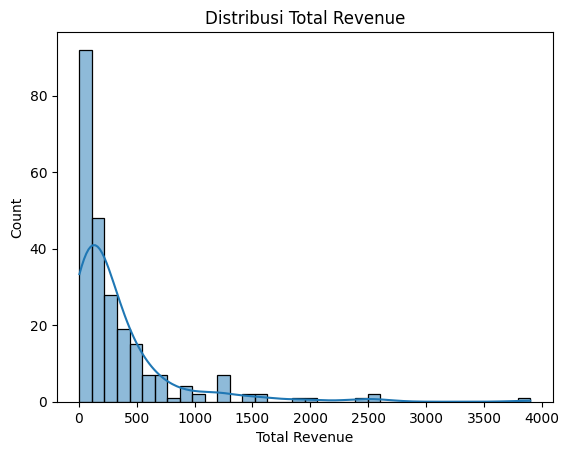

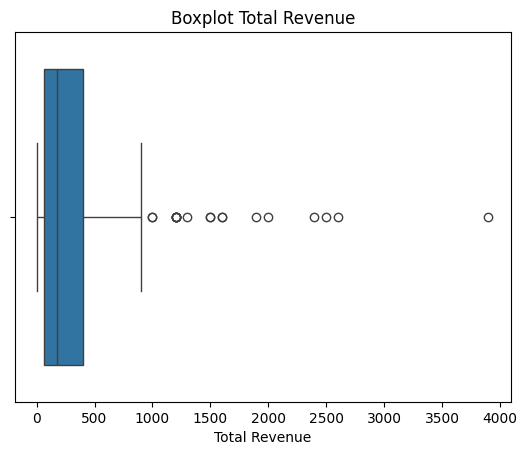

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Total Revenue'], kde=True)
plt.title('Distribusi Total Revenue')
plt.show()

sns.boxplot(x=df['Total Revenue'])
plt.title('Boxplot Total Revenue')
plt.show()

### 7.Bivariate

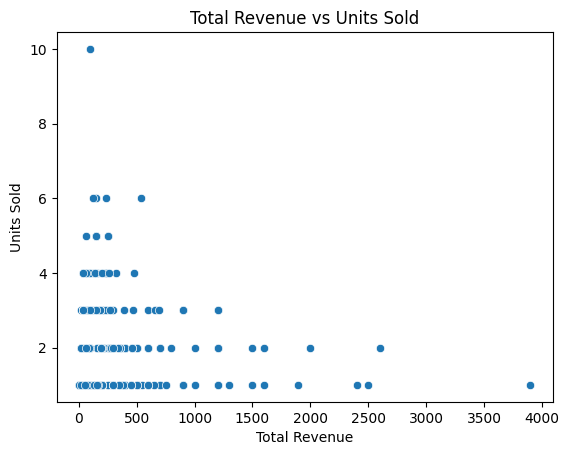

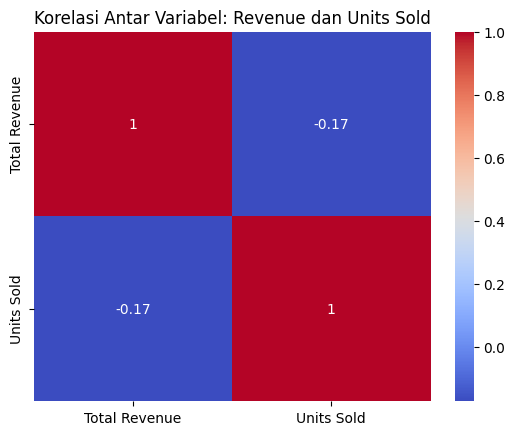

In [11]:
sns.scatterplot(x='Total Revenue', y='Units Sold', data=df)
plt.title('Total Revenue vs Units Sold')
plt.show()

correlation_matrix = df[['Total Revenue', 'Units Sold']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel: Revenue dan Units Sold')
plt.show()

### 8.Multivariate

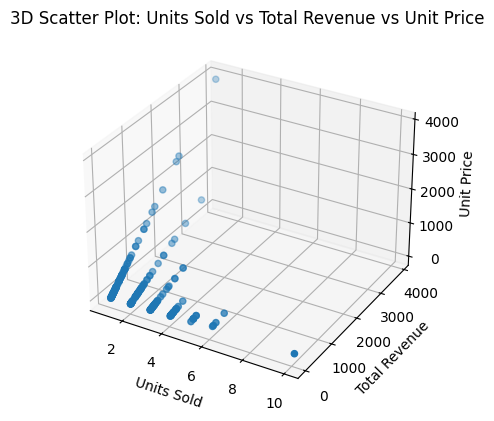

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Units Sold'], df['Total Revenue'], df['Unit Price'])
ax.set_xlabel('Units Sold')
ax.set_ylabel('Total Revenue')
ax.set_zlabel('Unit Price')
plt.title('3D Scatter Plot: Units Sold vs Total Revenue vs Unit Price')
plt.show()

## **Pre-processing: Data Cleaning - Aliya Nabila Shufa & Daffa Alif Ruriyanto**

### 1.Remove Duplicates

In [13]:
print("jumlah data sebelum remove duplicates:", df.shape[0])
df = df.drop_duplicates()
print("jumlah data setelah remove duplicates:", df.shape[0])
df

jumlah data sebelum remove duplicates: 240
jumlah data setelah remove duplicates: 240


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


- Dapat dilihat bahwa jumlah data sebelum dan sesudah remove duplicates **sama** maka data tersebut **tidak** terdapat duplicates data.
- Diperlukannya remove duplicate untuk memastikan data lebih bersih dari duplicate dan data busa saja berubah selama proses preparation.

###2.Detect and remove outliers

In [14]:
from scipy import stats
numeric_cols = ["Units Sold",	"Unit Price",	"Total Revenue"]
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores<3).all(axis=1)]
print("data setelah remove outliers:", df.shape)
df

data setelah remove outliers: (232, 9)


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


- zscore() digunakan untuk menghitung standard score dari setiap nilai terhadap datanya dan kelebihan zscore juga mudah+cepat, tidak perlu plot manual dan cocok untuk dataset yang besar dan bersih gitu.
- Hasilnya data tetap 1000 baris maka tidak ada baris yang terhapus, artinya 0 outliers.



###3.Remove Irrelevant data


In [15]:
irrelevant_cols = ["Transaction ID", "Date"]
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns])
df

,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
1,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
...,...,...,...,...,...,...,...
235,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


- Remove irrelevant data untuk mengurangi noise dalam data, jadi tidak terdapat kolom yang dianggap tidak penting tidak penting saat melakukan modeling.
- kenapa Transaction ID dan Date di sebut irrelevant data? karena kolom tersebut tidak punya nilai prediktif.

###4.Standardize capitalization

In [18]:
for col in df.select_dtypes(include="object").columns:
  df[col] = df[col].str.strip().str.title()
df

,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
1,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
...,...,...,...,...,...,...,...
235,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


- Standardize capitalization digunakan untuk menghindari error saat memproses string sehingga data lebih konsisten dan mudah diolah saat pemodelan.

###5.Convert Data Type

In [17]:
#df['Promotion'] = df['Promotion'].replace({'Yes': True, 'No': False})
#df['Seasonal'] = df['Seasonal'].replace({'Yes': True, 'No': False})

#df

* Convert data type Promotion dan Seasonal dari category menjadi nilai boolean

* Kenapa? Karena nilai boolean lebih efisien untuk perhitungan dan analitik untuk kedepannya

### 6.Clear Formatting

In [19]:
df.reset_index(drop=True, inplace=True)

* return type: Mengembalikan DataFrame baru dengan indeks yang baru.

* drop: Jika diatur ke True, indeks lama dibuang daripada ditambahkan sebagai kolom.

* inplace: Jika diatur ke True, operasi mengubah DataFrame yang ada tanpa mengembalikan yang baru.

In [20]:
df.columns = df.columns.str.strip()  # Menghapus spasi di awal/akhir
df.columns = df.columns.str.replace(" ", "_")  # Mengganti spasi " " dengan garis bawah "_"

In [21]:
df

,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
0,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
1,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
2,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
3,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
4,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
...,...,...,...,...,...,...,...
227,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
228,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
229,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
230,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


Clean Column name

## **Pre-processing: Feature Engineering - Irfan Alif Ahmadi**

### Feature Encoding

In [22]:
df_fe = df.copy()

In [23]:
df_fe = df_fe.drop(columns=['Product_Name'])

In [24]:
df_fe

,Product_Category,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
0,Home Appliances,1,499.99,499.99,Europe,PayPal
1,Clothing,3,69.99,209.97,Asia,Debit Card
2,Books,4,15.99,63.96,North America,Credit Card
3,Beauty Products,1,89.99,89.99,Europe,PayPal
4,Sports,5,29.99,149.95,Asia,Credit Card
...,...,...,...,...,...,...
227,Home Appliances,1,159.99,159.99,Europe,PayPal
228,Clothing,3,90.00,270.00,Asia,Debit Card
229,Books,3,10.99,32.97,North America,Credit Card
230,Beauty Products,1,55.00,55.00,Europe,PayPal


In [25]:
# One-Hot Encoding
df_fe = pd.get_dummies(df_fe, columns=['Product_Category', 'Region', 'Payment_Method'], dtype=int)

In [26]:
df_fe

,Units_Sold,Unit_Price,Total_Revenue,Product_Category_Beauty Products,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Sports,Region_Asia,Region_Europe,Region_North America,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal
0,1,499.99,499.99,0,0,0,0,1,0,0,1,0,0,0,1
1,3,69.99,209.97,0,0,1,0,0,0,1,0,0,0,1,0
2,4,15.99,63.96,0,1,0,0,0,0,0,0,1,1,0,0
3,1,89.99,89.99,1,0,0,0,0,0,0,1,0,0,0,1
4,5,29.99,149.95,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,159.99,159.99,0,0,0,0,1,0,0,1,0,0,0,1
228,3,90.00,270.00,0,0,1,0,0,0,1,0,0,0,1,0
229,3,10.99,32.97,0,1,0,0,0,0,0,0,1,1,0,0
230,1,55.00,55.00,1,0,0,0,0,0,0,1,0,0,0,1


### Feature Extraction

In [27]:
# Untuk mendeteksi produk yang mungkin overprice (harga di atas rata-rata) atau underprice (harga di bawah rata-rata) dengan tipe data float
df_fe['Relative_Price'] = df_fe['Unit_Price'] - df_fe['Unit_Price'].mean()

# Untuk mendeteksi produk yang mungkin overprice (harga di atas rata-rata) atau underprice (harga di bawah rata-rata) dengan tipe data int 0 dan 1
# 0 = no, 1 = yes
df_fe['Is_Overprice'] = (df_fe['Relative_Price'] > 0).astype(int)

In [28]:
df_fe

,Units_Sold,Unit_Price,Total_Revenue,Product_Category_Beauty Products,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Sports,Region_Asia,Region_Europe,Region_North America,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Relative_Price,Is_Overprice
0,1,499.99,499.99,0,0,0,0,1,0,0,1,0,0,0,1,318.390862,1
1,3,69.99,209.97,0,0,1,0,0,0,1,0,0,0,1,0,-111.609138,0
2,4,15.99,63.96,0,1,0,0,0,0,0,0,1,1,0,0,-165.609138,0
3,1,89.99,89.99,1,0,0,0,0,0,0,1,0,0,0,1,-91.609138,0
4,5,29.99,149.95,0,0,0,0,0,1,1,0,0,1,0,0,-151.609138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,159.99,159.99,0,0,0,0,1,0,0,1,0,0,0,1,-21.609138,0
228,3,90.00,270.00,0,0,1,0,0,0,1,0,0,0,1,0,-91.599138,0
229,3,10.99,32.97,0,1,0,0,0,0,0,0,1,1,0,0,-170.609138,0
230,1,55.00,55.00,1,0,0,0,0,0,0,1,0,0,0,1,-126.599138,0


In [29]:
# Untuk mendeteksi produk yang memiliki permintaan pasar yang tinggi
df_fe['Relative_Sold'] = df_fe['Units_Sold'] - df_fe['Units_Sold'].mean()

# Untuk mendeteksi produk yang memiliki permintaan pasar yang tinggi dengan tipe data int 0 dan 1
# 0 = no, 1 = yes
df_fe['Is_High_Demand'] = (df_fe['Relative_Sold'] > 0).astype(int)

In [30]:
df_fe

,Units_Sold,Unit_Price,Total_Revenue,Product_Category_Beauty Products,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Sports,Region_Asia,Region_Europe,Region_North America,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Relative_Price,Is_Overprice,Relative_Sold,Is_High_Demand
0,1,499.99,499.99,0,0,0,0,1,0,0,1,0,0,0,1,318.390862,1,-1.150862,0
1,3,69.99,209.97,0,0,1,0,0,0,1,0,0,0,1,0,-111.609138,0,0.849138,1
2,4,15.99,63.96,0,1,0,0,0,0,0,0,1,1,0,0,-165.609138,0,1.849138,1
3,1,89.99,89.99,1,0,0,0,0,0,0,1,0,0,0,1,-91.609138,0,-1.150862,0
4,5,29.99,149.95,0,0,0,0,0,1,1,0,0,1,0,0,-151.609138,0,2.849138,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,159.99,159.99,0,0,0,0,1,0,0,1,0,0,0,1,-21.609138,0,-1.150862,0
228,3,90.00,270.00,0,0,1,0,0,0,1,0,0,0,1,0,-91.599138,0,0.849138,1
229,3,10.99,32.97,0,1,0,0,0,0,0,0,1,1,0,0,-170.609138,0,0.849138,1
230,1,55.00,55.00,1,0,0,0,0,0,0,1,0,0,0,1,-126.599138,0,-1.150862,0


In [31]:
# Untuk mendeteksi produk yang memiliki tingkat penjualan yang tinggi
df_fe['Relative_Total_Revenue'] = df_fe['Total_Revenue'] - df_fe['Total_Revenue'].mean()

# Untuk mendeteksi produk yang memiliki tingkat penjualan yang tinggi dengan tipe data int 0 dan 1
# 0 = no, 1 = yes
df_fe['Is_High_Revenue'] = (df_fe['Relative_Total_Revenue'] > 0).astype(int)

In [32]:
df_fe

,Units_Sold,Unit_Price,Total_Revenue,Product_Category_Beauty Products,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Sports,Region_Asia,...,Region_North America,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Relative_Price,Is_Overprice,Relative_Sold,Is_High_Demand,Relative_Total_Revenue,Is_High_Revenue
0,1,499.99,499.99,0,0,0,0,1,0,0,...,0,0,0,1,318.390862,1,-1.150862,0,225.964052,1
1,3,69.99,209.97,0,0,1,0,0,0,1,...,0,0,1,0,-111.609138,0,0.849138,1,-64.055948,0
2,4,15.99,63.96,0,1,0,0,0,0,0,...,1,1,0,0,-165.609138,0,1.849138,1,-210.065948,0
3,1,89.99,89.99,1,0,0,0,0,0,0,...,0,0,0,1,-91.609138,0,-1.150862,0,-184.035948,0
4,5,29.99,149.95,0,0,0,0,0,1,1,...,0,1,0,0,-151.609138,0,2.849138,1,-124.075948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,159.99,159.99,0,0,0,0,1,0,0,...,0,0,0,1,-21.609138,0,-1.150862,0,-114.035948,0
228,3,90.00,270.00,0,0,1,0,0,0,1,...,0,0,1,0,-91.599138,0,0.849138,1,-4.025948,0
229,3,10.99,32.97,0,1,0,0,0,0,0,...,1,1,0,0,-170.609138,0,0.849138,1,-241.055948,0
230,1,55.00,55.00,1,0,0,0,0,0,0,...,0,0,0,1,-126.599138,0,-1.150862,0,-219.025948,0


## **Pre-processing: EDA - Bisma Riefky Alfarizaldo Bachtiar**

###Checking Data Table

In [33]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Category,232,6,Beauty Products,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Name,232,224,Garmin Forerunner 945,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Units_Sold,232.0,NaN,NaN,NaN,2.150862,1.230422,1.0,1.0,2.0,3.0,6.0
Unit_Price,232.0,NaN,NaN,NaN,181.599138,244.261082,6.5,29.375,89.99,229.96,1499.99
Total_Revenue,232.0,NaN,NaN,NaN,274.025948,307.870872,6.5,59.96,166.985,359.98,1599.98
Region,232,3,Europe,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payment_Method,232,3,Credit Card,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Product_Category  232 non-null    category
 1   Product_Name      232 non-null    category
 2   Units_Sold        232 non-null    int64   
 3   Unit_Price        232 non-null    float64 
 4   Total_Revenue     232 non-null    float64 
 5   Region            232 non-null    category
 6   Payment_Method    232 non-null    category
dtypes: category(4), float64(2), int64(1)
memory usage: 17.1 KB


In [35]:
from google.colab import data_table
data_table.DataTable(df)

,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
0,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
1,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
2,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
3,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
4,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
...,...,...,...,...,...,...,...
227,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
228,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
229,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
230,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


###Looking from Bar Plot

/tmp/ipython-input-2683700089.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Product_Category')['Units_Sold'].sum().plot(kind='bar')
/tmp/ipython-input-2683700089.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Region')['Units_Sold'].sum().plot(kind='bar')
/tmp/ipython-input-2683700089.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Payment_Method')['Units_Sold'].sum().p

Text(0, 0.5, 'Penjualan')

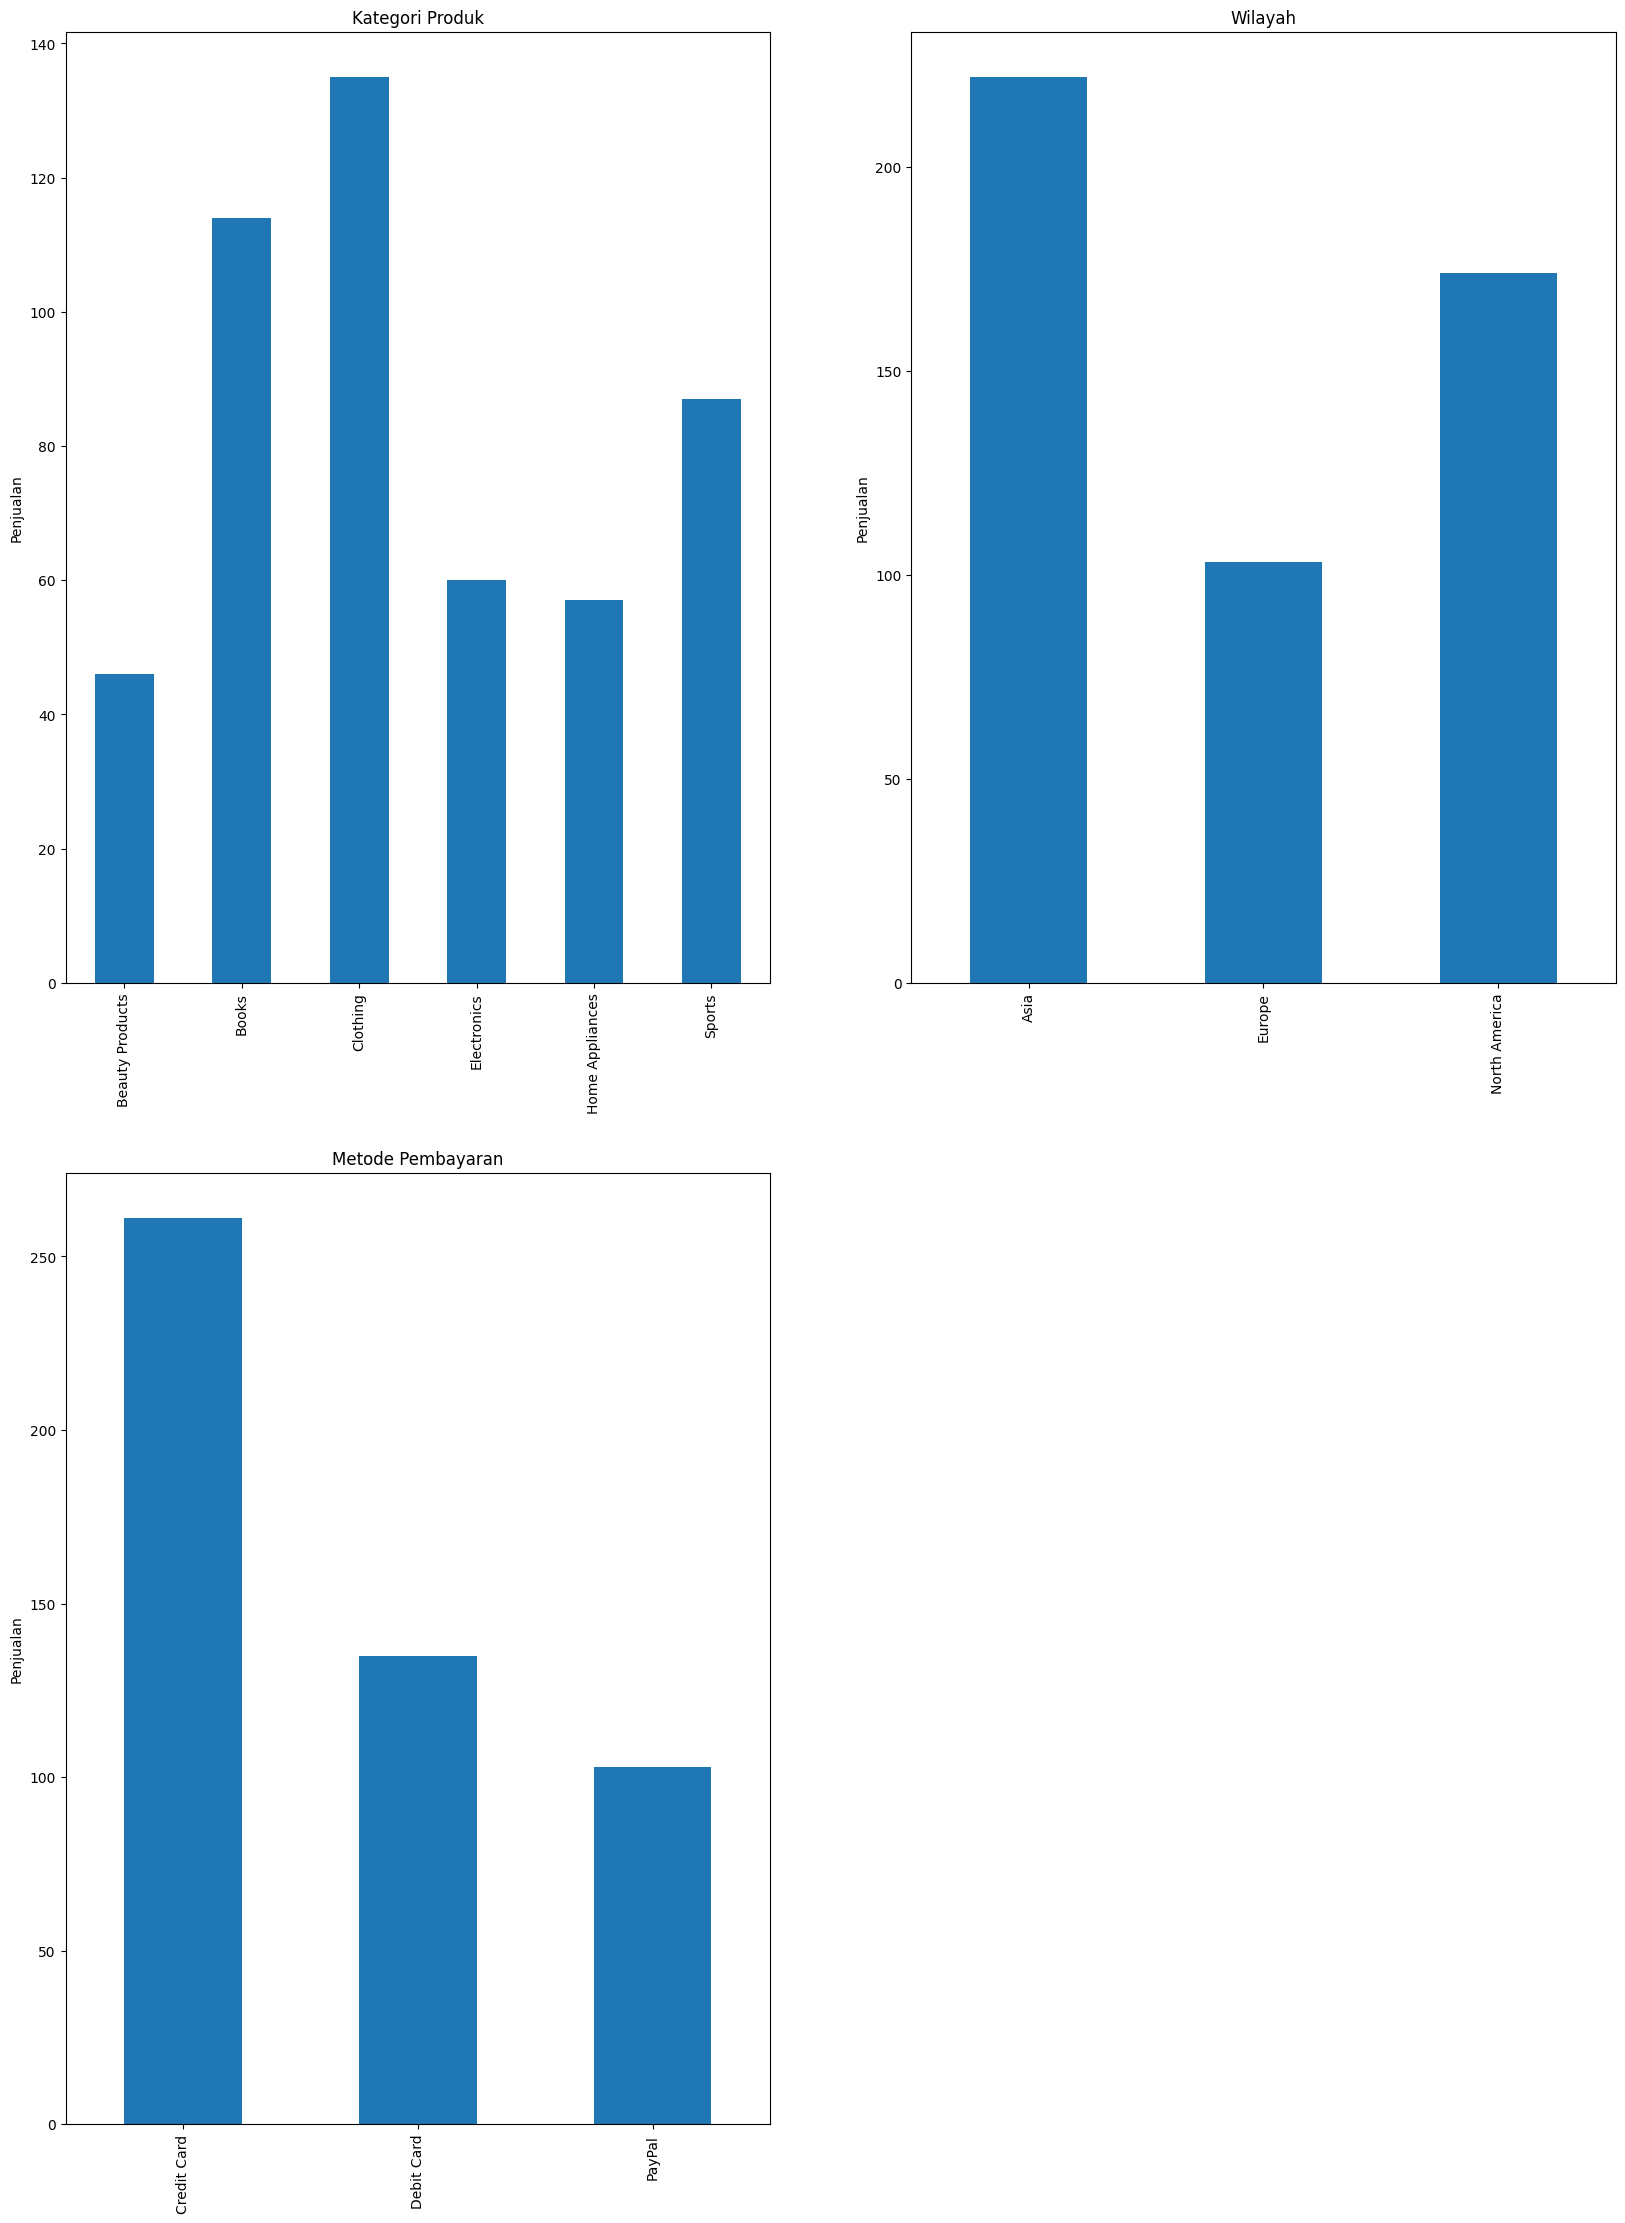

In [36]:
# Visualisasi Bar Plot untuk semua category
plt.figure(figsize=(20, 42))

# Bar plot untuk category product position
plt.subplot(3, 2, 1)  # 2 baris, 2 kolom, posisi ke-1
df.groupby('Product_Category')['Units_Sold'].sum().plot(kind='bar')
plt.title("Kategori Produk")
plt.xlabel('')
plt.ylabel('Penjualan')

# Bar plot untuk category Consumer_Demographics
plt.subplot(3, 2, 2)
df.groupby('Region')['Units_Sold'].sum().plot(kind='bar')
plt.title("Wilayah")
plt.xlabel('')
plt.ylabel('Penjualan')

# Bar plot untuk category Product_Category
plt.subplot(3, 2, 3)
df.groupby('Payment_Method')['Units_Sold'].sum().plot(kind='bar')
plt.title("Metode Pembayaran")
plt.xlabel('')
plt.ylabel('Penjualan')

###Looking from Heatmap

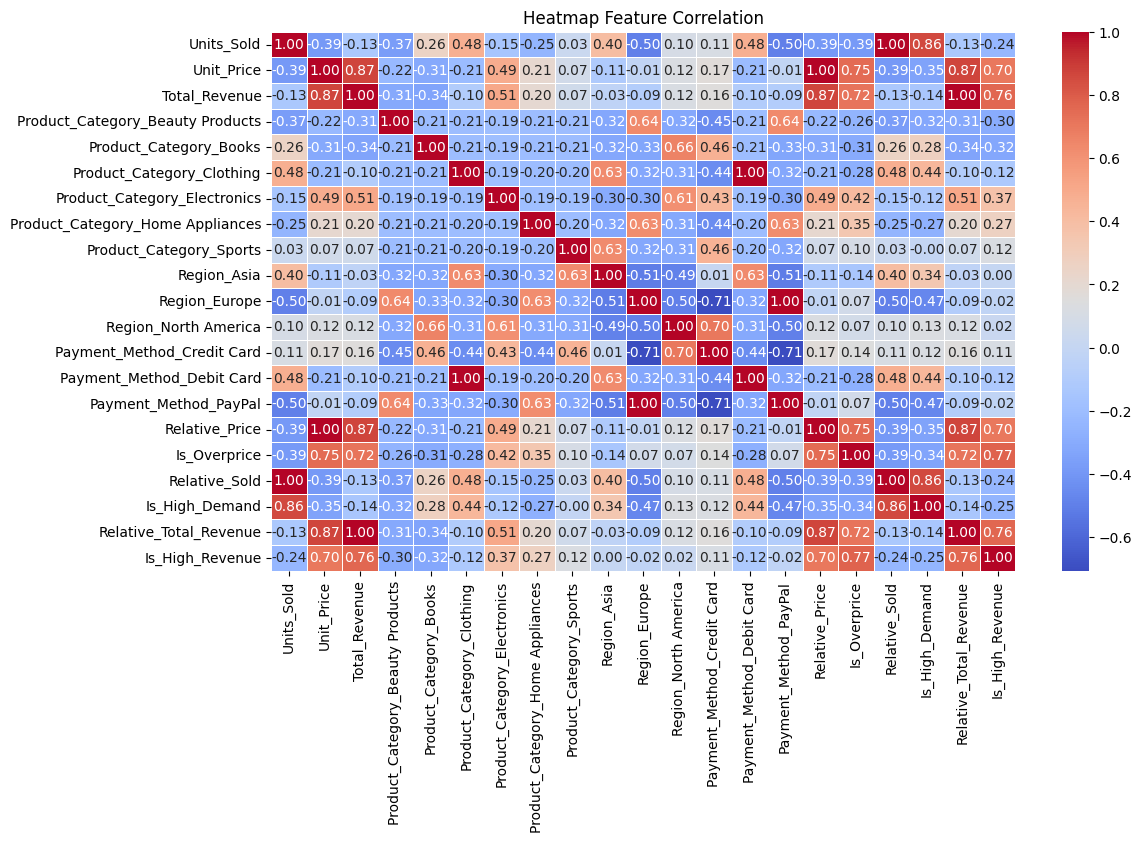

In [37]:
# itung matriks korelasi
correlation = df_fe.corr()

# nampilin korelasi pake bentuk heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Feature Correlation")
plt.show()

###Insight Data

- Kategori Produk paling banyak dijual itu Beauty
- Produk paling banyak berasal dari wilayah Europe
- Produk yang paling banyak kejual (terjual 6 kali) yakni Nike Air Force 1, Yeti Rambler Tumbler, Spalding NBA Street Basketball, dan Gap Essential Crewneck T-Shirt
- Kategori Produk yang paling banyak terjual yakni Baju
- Produk paling banyak terjual berasal dari wilayah Asia
- Metode Pembayaran paling sering digunakan yakni Credit Card
- Harga paling mahal berada pada kategori Produk Elektronik
- Kategori produk Beauty paling banyak dibayar dengan Paypal
- Kategori produk Beauty paling banyak dari wilayah Europe
- Kategori produk Buku paling banyak dari wilayah North America
- Kategori produk Baju paling banyak dibayar dengan Debit Card
- Kategori produk Baju paling banyak dari wilayah Asia
- Kategori produk Elektronik paling banyak dari wilayah North America
- Kategori produk Perabotan Rumah paling banyak dibayar dengan Paypal
- Kategori produk Perabotan Rumah paling banyak dari wilayah Europe
- Kategori produk Olahraga paling banyak dari wilayah Asia
- Metode Pembayaran paling banyak digunakan di wilayah Asia yakni Debit Card
- Metode Pembayaran paling banyak digunakan di wilayah Europe yakni Paypal
- Metode Pembayaran paling banyak digunakan di wilayah North America yakni Credit Card

## **Modelling: Create Model - Muhammad Rizcy**

In [38]:
print(df_fe.columns)

Index(['Units_Sold', 'Unit_Price', 'Total_Revenue',
       'Product_Category_Beauty Products', 'Product_Category_Books',
       'Product_Category_Clothing', 'Product_Category_Electronics',
       'Product_Category_Home Appliances', 'Product_Category_Sports',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Payment_Method_Credit Card', 'Payment_Method_Debit Card',
       'Payment_Method_PayPal', 'Relative_Price', 'Is_Overprice',
       'Relative_Sold', 'Is_High_Demand', 'Relative_Total_Revenue',
       'Is_High_Revenue'],
      dtype='object')


### Linear Regression

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

X = df_fe.drop(columns=['Units_Sold', 'Total_Revenue', 'Relative_Sold', 'Relative_Total_Revenue'])
y = df_fe['Units_Sold']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_test_pred_lr = model_lr.predict(X_test)
y_train_pred_lr = model_lr.predict(X_train)

## **Modelling: Model Evaluation - Sakanti Dwi Bhanuwati**

In [40]:
# === Evaluasi TESTING ===
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)
r2_train_lr= r2_score(y_train, y_train_pred_lr)

# === Cetak Hasil Evaluasi ===
print(f" R² Score (Training): {r2_train_lr:.4f}")
print(f" R² Score (Testing): {r2_test_lr:.4f}")
print(f" Mean Absolute Error (MAE): {mae_test_lr:.2f}")
print(f" Mean Squared Error (MSE): {mse_test_lr:.2f}")
print(f" Root Mean Squared Error (RMS): {rmse_test_lr:.2f}")

 R² Score (Training): 0.7807
 R² Score (Testing): 0.7776
 Mean Absolute Error (MAE): 0.39
 Mean Squared Error (MSE): 0.21
 Root Mean Squared Error (RMS): 0.46


Model regresi linear ini menunjukkan hasil yang cukup baik, dengan R² pada data pelatihan sebesar 0.7807 dan pada data pengujian sebesar 0.7776, yang mengindikasikan bahwa sekitar 77-78% variabilitas dalam data dapat dijelaskan oleh model. Nilai Mean Absolute Error (MAE) sebesar 0.39 menunjukkan bahwa rata-rata kesalahan prediksi adalah 0.39 unit, sementara Mean Squared Error (MSE) sebesar 0.21 menunjukkan tingkat kesalahan kuadrat yang relatif rendah. Root Mean Squared Error (RMSE) sebesar 0.46 memberi gambaran tentang kesalahan rata-rata prediksi model, yang berada pada 0.46 unit. Secara keseluruhan, model ini menunjukkan akurasi yang baik dan tidak terindikasi overfitting, karena performanya cukup konsisten antara data pelatihan dan pengujian.

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest dengan setting yang lebih optimal
model_rf = RandomForestRegressor(
    n_estimators=300,        # jumlah pohon, makin banyak makin stabil
    max_depth=15,            # batasi kedalaman supaya tidak overfitting
    min_samples_split=5,     # minimal data untuk split
    min_samples_leaf=2,      # minimal data di daun
    max_features='sqrt',     # pilih fitur secara acak -> lebih kuat
    random_state=42,
    n_jobs=-1                # pakai semua CPU cores biar cepat
)

# Train model
model_rf.fit(X_train, y_train)

# Predict
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)


In [42]:
# === Evaluasi TESTING ===
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
r2_train_rf= r2_score(y_train, y_train_pred_rf)

# === Cetak Hasil Evaluasi ===
print(f" R² Score (Training): {r2_train_rf:.4f}")
print(f" R² Score (Testing): {r2_test_rf:.4f}")
print(f" Mean Absolute Error (MAE): {mae_test_rf:.2f}")
print(f" Mean Squared Error (MSE): {mse_test_rf:.2f}")
print(f" Root Mean Squared Error (RMS): {rmse_test_rf:.2f}")

 R² Score (Training): 0.8664
 R² Score (Testing): 0.8060
 Mean Absolute Error (MAE): 0.35
 Mean Squared Error (MSE): 0.18
 Root Mean Squared Error (RMS): 0.43


Model Random Forest ini menunjukkan kinerja yang baik, dengan R² pada data pelatihan sebesar 0.8664 dan pada data pengujian sebesar 0.8060, yang berarti model dapat menjelaskan sekitar 81-87% variabilitas dalam data, baik untuk data pelatihan maupun pengujian. Nilai Mean Absolute Error (MAE) sebesar 0.35 mengindikasikan bahwa rata-rata kesalahan prediksi adalah 0.35 unit, sementara Mean Squared Error (MSE) sebesar 0.18 menunjukkan tingkat kesalahan kuadrat yang relatif rendah. Root Mean Squared Error (RMSE) sebesar 0.43 memberikan gambaran bahwa kesalahan rata-rata prediksi model adalah 0.43 unit. Secara keseluruhan, model ini menunjukkan akurasi yang solid, dengan performa yang sedikit lebih tinggi pada data pelatihan dibandingkan data pengujian, namun masih menunjukkan kemampuan generalisasi yang baik dan tidak mengalami overfitting signifikan.

### XGBRegressor

In [43]:
!pip install xgboost

In [44]:
from xgboost import XGBRegressor

In [45]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid untuk XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 10]
}

xgb = XGBRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,              # Jumlah kombinasi yang diuji
    scoring='r2',           # Gunakan skor R²
    cv=3,                   # Cross-validation 3-fold
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Model terbaik hasil tuning
best_xgb = random_search.best_estimator_

y_train_pred_best = best_xgb.predict(X_train)
y_test_pred_best = best_xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_best))

print(f"R² Score (Train): {r2_score(y_train, y_train_pred_best):.4f}")
print(f"R² Score (Test) : {r2_score(y_test, y_test_pred_best):.4f}")
print(f"MAE (Test)      : {mean_absolute_error(y_test, y_test_pred_best):.4f}")
print(f"MSE (Test)      : {mean_squared_error(y_test, y_test_pred_best):.4f}")
print(f"RMSE (Test)     : {rmse:.4f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
R² Score (Train): 0.8568
R² Score (Test) : 0.8290
MAE (Test)      : 0.3206
MSE (Test)      : 0.1630
RMSE (Test)     : 0.4038


Model XGBoost ini menunjukkan kinerja yang sangat baik, dengan R² pada data pelatihan sebesar 0.8568 dan pada data pengujian sebesar 0.8290, yang berarti model dapat menjelaskan sekitar 83-86% variabilitas dalam data, baik untuk data pelatihan maupun pengujian. Nilai Mean Absolute Error (MAE) sebesar 0.3206 menunjukkan bahwa rata-rata kesalahan prediksi adalah 0.32 unit, sementara Mean Squared Error (MSE) sebesar 0.1630 menunjukkan bahwa kesalahan kuadrat relatif kecil. Root Mean Squared Error (RMSE) sebesar 0.4038 mengindikasikan kesalahan rata-rata prediksi model sebesar 0.40 unit. Secara keseluruhan, model ini memberikan hasil yang sangat baik dengan kemampuan generalisasi yang kuat, menunjukkan performa yang hampir sebanding antara data pelatihan dan pengujian, tanpa indikasi overfitting yang signifikan.

## **Kesimpulan Final Project**

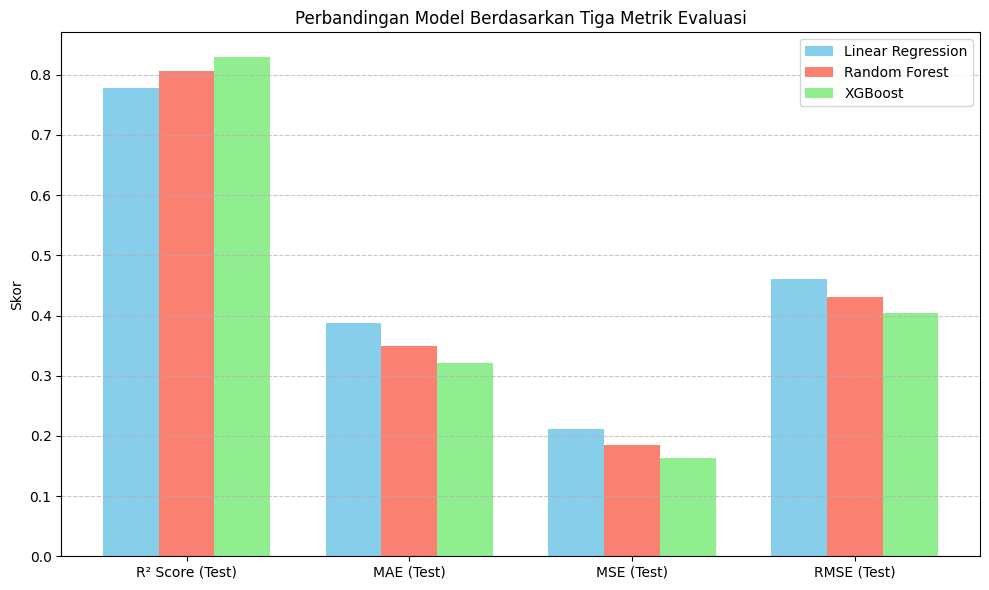

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nama model
models = ['Linear Regression', 'Random Forest', 'XGBoost']

# Nilai metrik evaluasi
r2_test = [r2_test_lr, r2_test_rf, r2_score(y_test, y_test_pred_best)]
mae_test = [mae_test_lr, mae_test_rf, mean_absolute_error(y_test, y_test_pred_best)]
mse_test = [mse_test_lr, mse_test_rf, mean_squared_error(y_test, y_test_pred_best)]
rmse_test = [rmse_test_lr, rmse_test_rf, rmse]


# Gabungkan metrik ke dalam satu array
metrics = ['R² Score (Test)', 'MAE (Test)', 'MSE (Test)', 'RMSE (Test)']
values = [
    [r2_test[0], mae_test[0], mse_test[0], rmse_test[0]],   # Linear Regression
    [r2_test[1], mae_test[1], mse_test[1],rmse_test[1]],   # Random Forest
    [r2_test[2], mae_test[2], mse_test[2],rmse_test[2]]    # Best Model
]

# Konversi ke numpy array untuk mempermudah plotting
values = np.array(values)

# Konfigurasi lebar dan posisi bar
bar_width = 0.25
x = np.arange(len(metrics))

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, values[0], width=bar_width, label='Linear Regression', color='skyblue')
plt.bar(x, values[1], width=bar_width, label='Random Forest', color='salmon')
plt.bar(x + bar_width, values[2], width=bar_width, label='XGBoost', color='lightgreen')

# Konfigurasi tampilan grafik
plt.xticks(x, metrics)
plt.title('Perbandingan Model Berdasarkan Tiga Metrik Evaluasi')
plt.ylabel('Skor')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Dari ketiga model yang diuji, XGBoost menunjukkan kinerja terbaik dengan R² sebesar 0.8290 pada data uji dan nilai kesalahan yang lebih rendah (MAE: 0.3206, MSE: 0.1630, RMSE: 0.4038), memberikan kemampuan generalisasi yang kuat dan akurasi yang tinggi. Random Forest juga memberikan hasil yang sangat baik dengan R² 0.8060 pada data uji dan kesalahan yang sedikit lebih rendah dibandingkan Linear Regression (MAE: 0.35, MSE: 0.18, RMSE: 0.43), namun XGBoost masih unggul dalam hal kesalahan dan konsistensi. Linear Regression, meskipun cukup baik, menunjukkan kinerja yang lebih rendah dengan R² 0.7776 dan kesalahan yang lebih besar, menjadikannya model yang kurang efektif dibandingkan kedua model lainnya dalam menangani kompleksitas data.